In [211]:
"""Тема: "Корреляция данных"
Задача 
ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Задание 1 
Построить точечный график+
Рассчитать коэффициенты корреляции Пирсона и Спирмена+
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

Задание 2
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности""""

import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('water.csv')
df.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
#Ключевыми атрибутами являются mortality – смертность и hardness – жесткость, эти столбцы числовые, количественные значения
#А теперь приступим к изучению визуализации данных в pandas.

In [228]:
rcParams['figure.figsize'] = 12,5

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


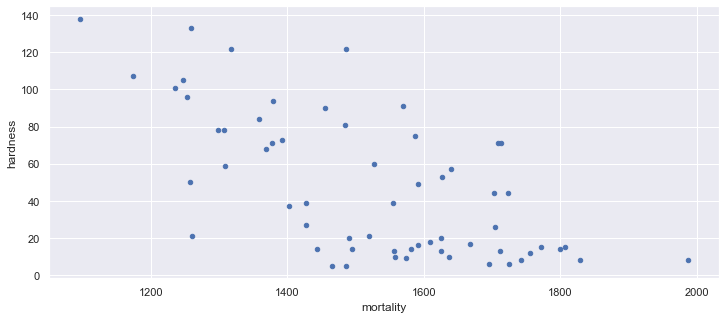

In [229]:
df.plot(kind='scatter', x='mortality', y='hardness') 
# построим точечный график зависимости по оси  x - расположим смертность, по оси y возьмем жесткость воды.
# Смотрим на визуализацю и выдвигаем гипотезу взаимосвязи этих величин: 
# взаимосвязь между жесткостью воды и смертностью - явно не прослеживается
# в общих чертах видим обратную корреляцию. Т.е пока прямой зависимости нет,
#чтобы это подтвердить или опровергнуть расчитаем коэффициэнты Спирмена и Кенделла

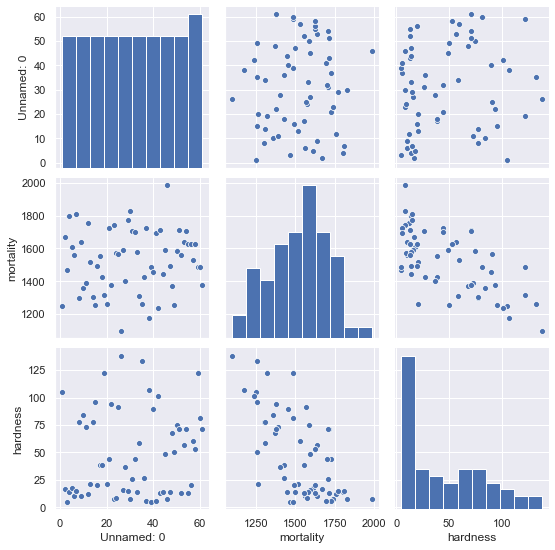

In [230]:
sns.pairplot(df) # используем pairplot для изучения взаимосвязи множественных признаков

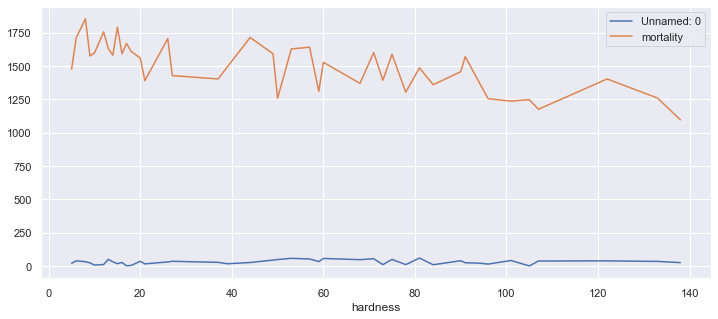

In [231]:
d = df.groupby('hardness').mean()
d.plot()

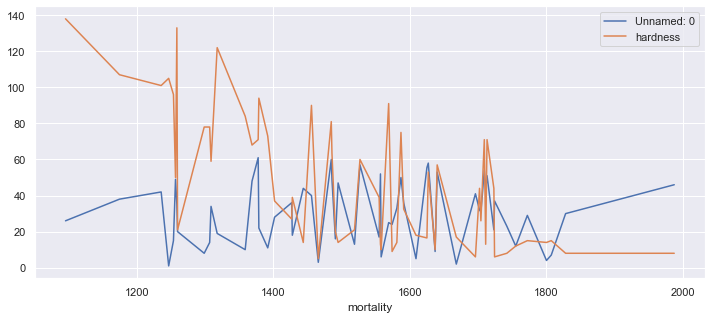

In [232]:
d = df.groupby('mortality').mean()
d.plot()

In [233]:
# Рассчитать коэффициент корреляции Пирсона 
df[['mortality','hardness']].corr

<bound method DataFrame.corr of     mortality  hardness
0        1247       105
1        1668        17
2        1466         5
3        1800        14
4        1609        18
..        ...       ...
56       1527        60
57       1627        53
58       1486       122
59       1485        81
60       1378        71

[61 rows x 2 columns]>

In [234]:
# Рассчитать коэффициент корреляции Спирмена
df[['mortality','hardness']].corr(method = 'spearman')
#Это ковариация двух переменных поделить на их дисперсии.
#Т.к Величина коэффициента корреляции заключена в пределах -1 <= r <= 0, 
# то имеет место обратная связь, при увеличении значений одной из величин значения другой имеют тенденцию к уменьшению 

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [225]:
# Рассчитать коэффициент корреляции Кенделла
df[['mortality','hardness']].corr(method = 'kendall')
#Это ковариация двух переменных поделить на их дисперсии.
#Т.к Величина коэффициента корреляции заключена в пределах -1 <= r <= 0, 
# то имеет место обратная связь, при увеличении значений одной из величин значения другой имеют тенденцию к уменьшению 

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [235]:
df.corr() # на Unnamed  не обращаем внимания т.к это порядковая величина

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


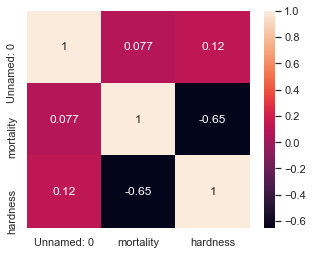

In [238]:
# строим тепловую карту
sns.set(rc={'figure.figsize':(5.0,4.0)})
sns.heatmap(df.corr(),annot= True)

In [239]:
# Построим модель линейной регрессии
# Реализация простой линейной регрессии начинается с заданным набором пар x-y. Эти пары – результаты наблюдений. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [240]:
X = df[['mortality']]
y = df['hardness']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [242]:
X_train.shape

(42, 1)

In [243]:
y_train.shape

(42,)

In [244]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [245]:
model.coef_

array([-0.12670202])

In [246]:
model.intercept_

239.3678426140957

In [247]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [248]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.4948982822876836

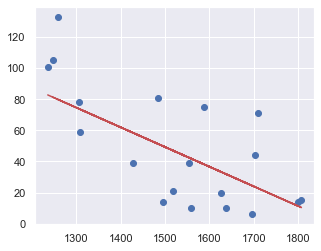

In [249]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
# видим нелинейную регрессию.
# связь между параметрами отсутствует 

In [250]:
# ГРАФИК ОСТАТКОВ
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [251]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [252]:
X_const.shape

(42, 2)

In [253]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           7.83e-06
Time:                        23:00:15   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

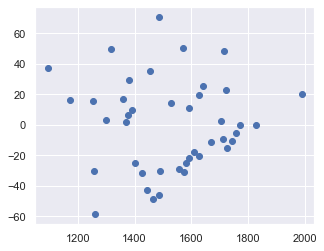

In [254]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([3., 1., 9., 5., 6., 7., 5., 2., 3., 1.]),
 array([-58.7233036 , -45.75983806, -32.79637252, -19.83290698,
         -6.86944144,   6.0940241 ,  19.05748964,  32.02095518,
         44.98442072,  57.94788627,  70.91135181]),
 <a list of 10 Patch objects>)

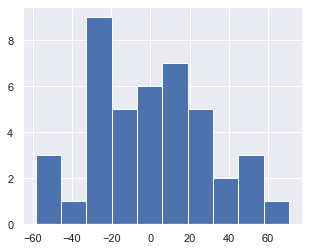

In [255]:
plt.hist(results.resid)

south location

In [ ]:
#СДЕЛАЕМ ДАТАФРЕЙМ С ОТФИЛЬТРОВАННЫМИ ДАННЫМИ South Location
df_south = df.loc[(df.location == 'South')]
df_south.head()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


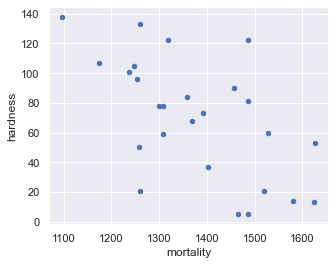

In [257]:
df_south.plot(kind='scatter', x='mortality', y='hardness') 

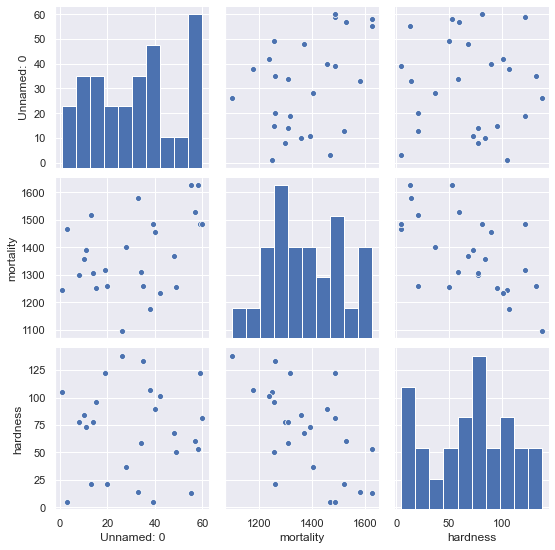

In [258]:
sns.pairplot(df_south) # используем pairplot для изучения взаимосвязи  признаков в South Location

In [259]:
# Рассчитаем коэффициент корреляции Пирсона в South Location
df_south[['mortality','hardness']].corr

<bound method DataFrame.corr of     mortality  hardness
0        1247       105
2        1466         5
7        1299        78
9        1359        84
10       1392        73
12       1519        21
13       1307        78
14       1254        96
18       1318       122
19       1260        21
25       1096       138
27       1402        37
32       1581        14
33       1309        59
34       1259       133
37       1175       107
38       1486         5
39       1456        90
41       1236       101
47       1369        68
48       1257        50
54       1625        13
56       1527        60
57       1627        53
58       1486       122
59       1485        81>

In [260]:
# Рассчитаем коэффициент корреляции Спирмена в South Location
df_south[['mortality','hardness']].corr(method = 'spearman')
# видим разницу в меньшую сторону по абсолютному значению величины  по сравнению с общим датафреймом df,
#где присуствовали данными по обоим регионам South и North Location ( |-0,59|<|-0,63|)

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [161]:
# Рассчитать коэффициент корреляции Кенделла в South Location
df_south[['mortality','hardness']].corr(method = 'kendall')
# видим разницу в меньшую сторону по абсолютному значению величины  по сравнению с общим датафреймом df,
#где присуствовали данными по обоим регионам South и North Location (|-0,44|)<|-0,45|)

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


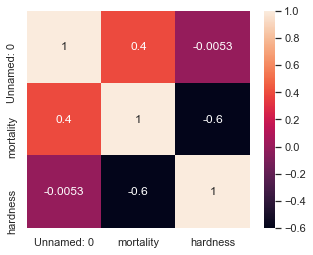

In [283]:
# строим тепловую карту South Location
sns.set(rc={'figure.figsize':(5.0,4.0)})
sns.heatmap(df_south.corr(),annot= True)

In [306]:
# Построим модель линейной регрессии для South Location
X1 = df_south[['mortality']]
y1 = df_south['hardness']

In [307]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [308]:
X1_train.shape

(18, 1)

In [309]:
y1_train.shape

(18,)

In [310]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [311]:
model1.coef_

array([-0.18112812])

In [312]:
model1.intercept_

324.11907462359864

In [313]:
y1_pred = model1.predict(X1_test)
y1_pred

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

In [314]:
model1.score(X1_test, y1_test) # метод возвращает значение коэффициента детерминации

-0.05226615794483824

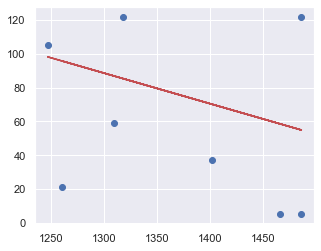

In [315]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y1_pred, c='r')
# видим нелинейную регрессию.
# связь между параметрами отсутствует 

In [316]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [317]:
X1_const = sm.add_constant(X1_train) # техническая особенность библиотек, надо руками добавить константу

In [318]:
X1_const.shape

(18, 2)

In [291]:
model1 = sm.OLS(y1_train, X1_const)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           7.30e-05
Time:                        23:15:49   Log-Likelihood:                -80.286
No. Observations:                  18   AIC:                             164.6
Df Residuals:                      16   BIC:                             166.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.1191     47.493      6.825      0.0

C:\Users\Admin\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


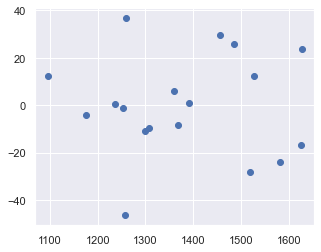

In [319]:
# посмотрим на остатки
plt.scatter(X1_const.iloc[:, 1], results.resid)

(array([1., 0., 2., 1., 3., 4., 1., 2., 2., 2.]),
 array([-46.44102675, -38.10480112, -29.7685755 , -21.43234987,
        -13.09612425,  -4.75989863,   3.576327  ,  11.91255262,
         20.24877825,  28.58500387,  36.92122949]),
 <a list of 10 Patch objects>)

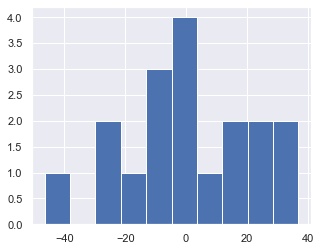

In [320]:
plt.hist(results.resid)

North Location

In [343]:
#СДЕЛАЕМ ДАТАФРЕЙМ С ОТФИЛЬТРОВАННЫМИ ДАННЫМИ North Location
df_north = df.loc[(df.location == 'North')]
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


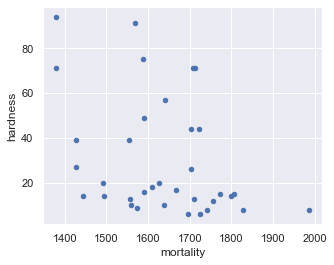

In [344]:
df_north.plot(kind='scatter', x='mortality', y='hardness') 

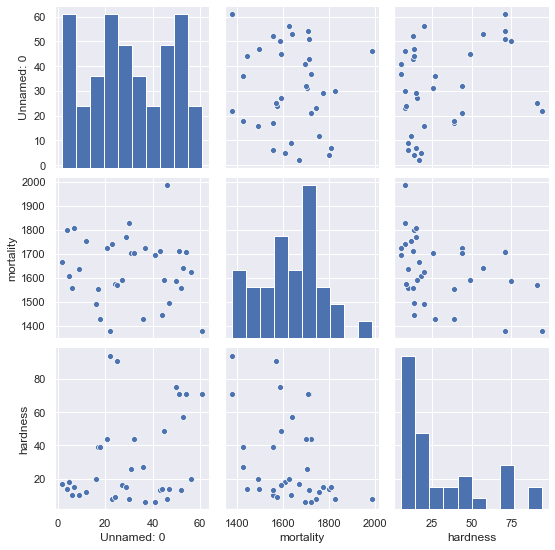

In [296]:
sns.pairplot(df_north) # используем pairplot для изучения взаимосвязи признаков в North Location
# Видим, что графики чуть отличаются от аналогичных графиков South Location, в более линейную сторону 
# по нижней границу hardness до 20,
# но по итогу взаимосвязь между жесткостью воды и смертностью - тоже явно не прослеживается

In [297]:
# Рассчитаем коэффициент корреляции Пирсона в North Location
df_north[['mortality','hardness']].corr

<bound method DataFrame.corr of     mortality  hardness
1        1668        17
3        1800        14
4        1609        18
5        1558        10
6        1807        15
8        1637        10
11       1755        12
15       1491        20
16       1555        39
17       1428        39
20       1723        44
21       1379        94
22       1742         8
23       1574         9
24       1569        91
26       1591        16
28       1772        15
29       1828         8
30       1704        26
31       1702        44
35       1427        27
36       1724         6
40       1696         6
42       1711        13
43       1444        14
44       1591        49
45       1987         8
46       1495        14
49       1587        75
50       1713        71
51       1557        13
52       1640        57
53       1709        71
55       1625        20
60       1378        71>

In [298]:
# Рассчитаем коэффициент корреляции Спирмена в North Location
df_north[['mortality','hardness']].corr(method = 'spearman')
# видим разницу в меньшую сторону по абсолютному значению величины  по сравнению с общим датафреймом df,
#где присуствовали данными по обоим регионам South и North Location (|-0,40|<|-0,44|)
# и в еще меньшую сторону относительно аналогичного расчета по South Location (|-0,40|<|-0,45|)

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [299]:
# Рассчитаем коэффициент корреляции Кенделла в North Location
df_north[['mortality','hardness']].corr(method = 'kendall')
# видим разницу в меньшую сторону по абсолютному значению величины по сравнению с общим датафреймом df,
#где присуствовали данными по обоим регионам South и North Location (|-0,28|<|-0,60|)
# и в еще меньшую сторону относительно аналогичного расчета по South Location (|-0,28|<|-0,60|)

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


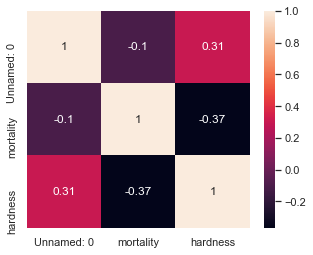

In [300]:
# строим тепловую карту North Location
sns.set(rc={'figure.figsize':(5.0,4.0)})
sns.heatmap(df_north.corr(),annot= True)

In [345]:
# Построим модель линейной регрессии для North Location
X2 = df_north[['mortality']]
y2 = df_north['hardness']

In [346]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [347]:
X2_train.shape

(24, 1)

In [348]:
y2_train.shape

(24,)

In [349]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [350]:
model2.coef_

array([-0.09774218])

In [351]:
model2.intercept_

191.72797679112006

In [352]:
y2_pred = model2.predict(X2_test)
y2_pred

array([-2.48573411, 37.88178607, 50.58826942, 23.22045913, 36.22016902,
       24.29562311, 25.37078708, 21.4610999 , 39.73888749, 18.52883451,
       52.1521443 ])

In [353]:
model2.score(X2_test, y2_test) # метод возвращает значение коэффициента детерминации

-0.34863672627416675

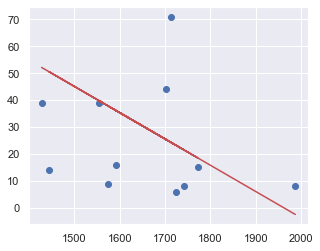

In [354]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_pred, c='r')
# видим нелинейную регрессию.
# связь между параметрами также отсутствует 

In [355]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [356]:
X2_const = sm.add_constant(X2_train) # техническая особенность библиотек, надо руками добавить константу

In [357]:
X2_const.shape

(24, 2)

In [358]:
model2 = sm.OLS(y2_train, X2_const)
results = model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sat, 21 Nov 2020   Prob (F-statistic):             0.0316
Time:                        23:45:25   Log-Likelihood:                -111.11
No. Observations:                  24   AIC:                             226.2
Df Residuals:                      22   BIC:                             228.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.7280     69.297      2.767      0.0

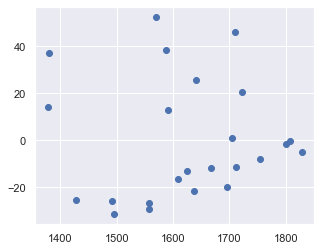

In [359]:
# посмотрим на остатки
plt.scatter(X2_const.iloc[:, 1], results.resid)

(array([5., 3., 4., 4., 0., 2., 2., 0., 2., 2.]),
 array([-31.60341826, -23.18012614, -14.75683401,  -6.33354188,
          2.08975025,  10.51304238,  18.93633451,  27.35962664,
         35.78291877,  44.2062109 ,  52.62950303]),
 <a list of 10 Patch objects>)

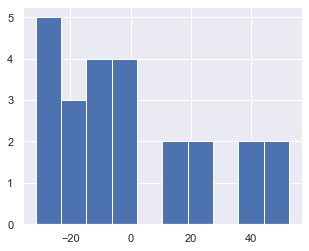

In [360]:
plt.hist(results.resid)

In [ ]:
#ОТВЕТ: линейной зависимости жёсткостью воды и средней годовой смертностью - нет, 
#ни по отношению к совокупности South и North Location, ни для каждого их них в отдельности
